In [1]:
from pandas import read_csv
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame

from dateutil.parser import parse
from math import sqrt

import matplotlib
from matplotlib import pyplot
import seaborn as sns

import numpy as np 
import math 

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow
from keras import callbacks
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [3]:
series = read_csv('../datasets/data.csv')
arima_series  = read_csv('../datasets/data.csv', header=0, parse_dates=[0], index_col=0, squeeze=0)

#### 1 ==> transport
#### 2 ==> ploughing
#### 3 ==> ploughing & transport 

In [4]:
print(series.head(10))

                           date  work  income
0  Thursday, September 30, 2021     2    2100
1      Sunday, October 03, 2021     1    3600
2      Monday, October 04, 2021     1    4000
3     Tuesday, October 05, 2021     1    7900
4   Wednesday, October 06, 2021     1    7500
5    Thursday, October 07, 2021     1   10600
6      Friday, October 08, 2021     1    6700
7    Saturday, October 09, 2021     3    5800
8      Sunday, October 10, 2021     1    6800
9      Monday, October 11, 2021     3    8000


In [5]:
series.columns

Index(['date', 'work', 'income'], dtype='object')

In [6]:
series['date'] = pd.to_datetime(series['date'])

In [7]:
series.head()

,date,work,income
0,2021-09-30,2,2100
1,2021-10-03,1,3600
2,2021-10-04,1,4000
3,2021-10-05,1,7900
4,2021-10-06,1,7500


In [8]:
series_1 = series.copy()

In [9]:
series['Year'] = series['date'].dt.year
series['Month'] = series['date'].dt.month
series['Date'] = series['date'].dt.day
#series['Hour'] = series['date'].dt.hour
series['Day'] = series.date.dt.strftime("%A")

series.head()

,date,work,income,Year,Month,Date,Day
0,2021-09-30,2,2100,2021,9,30,Thursday
1,2021-10-03,1,3600,2021,10,3,Sunday
2,2021-10-04,1,4000,2021,10,4,Monday
3,2021-10-05,1,7900,2021,10,5,Tuesday
4,2021-10-06,1,7500,2021,10,6,Wednesday


In [10]:
series.tail()

,date,work,income,Year,Month,Date,Day
187,2022-07-04,1,12600,2022,7,4,Monday
188,2022-07-05,1,10300,2022,7,5,Tuesday
189,2022-07-06,1,10000,2022,7,6,Wednesday
190,2022-07-07,2,12500,2022,7,7,Thursday
191,2022-07-08,1,2000,2022,7,8,Friday


In [11]:
colors = ['green', 'red', 'blue']

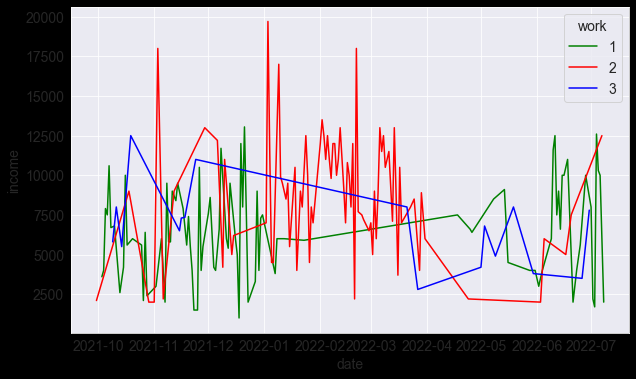

In [12]:
t_series = sns.lineplot(x=series['date'], y='income', data=series, hue='work', palette=colors)

#### 1 ==> transport
#### 2 ==> ploughing
#### 3 ==> ploughing & transport 

In [13]:
series.columns

Index(['date', 'work', 'income', 'Year', 'Month', 'Date', 'Day'], dtype='object')

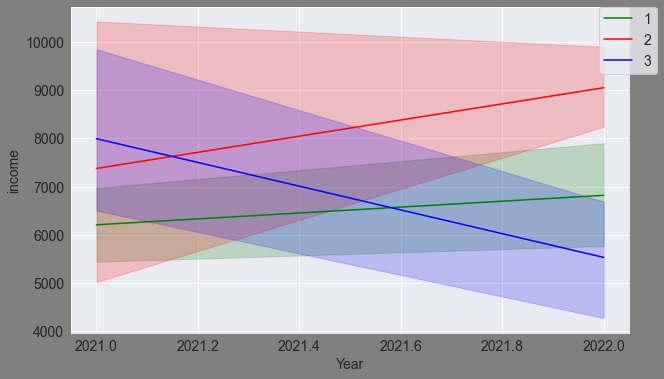

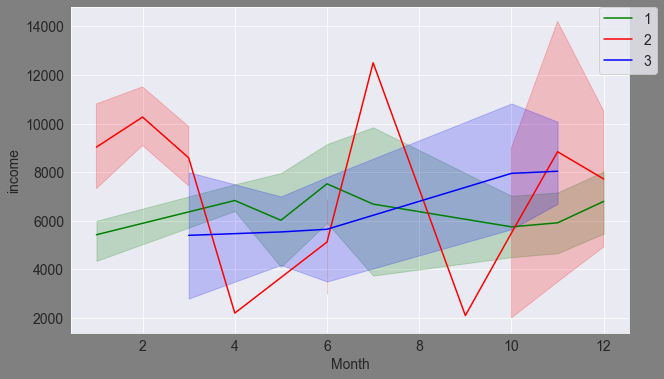

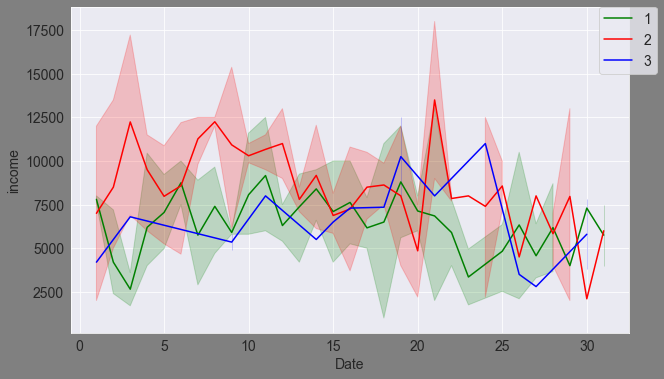

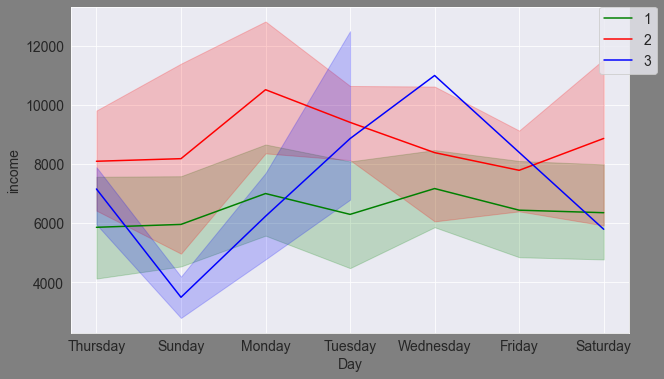

In [14]:
n_features = ['Year', 'Month', 'Date', 'Day']

for i in n_features:
    pyplot.figure(figsize=(10,6), facecolor="#808080")
    ax = sns.lineplot(x=series[i], y='income', data=series, hue='work', palette=colors)
    
    pyplot.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    
    #### 1 ==> transport
    #### 2 ==> ploughing
    #### 3 ==> ploughing & transport 

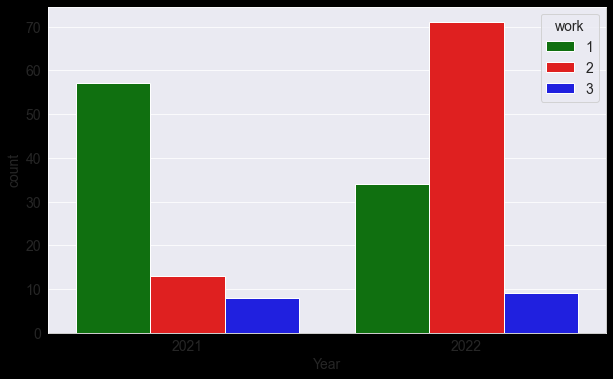

In [15]:
count = sns.countplot(data=series, x=series['Year'], hue='work', palette=colors)

#### 1 ==> transport
#### 2 ==> ploughing
#### 3 ==> ploughing & transport 

<AxesSubplot:>

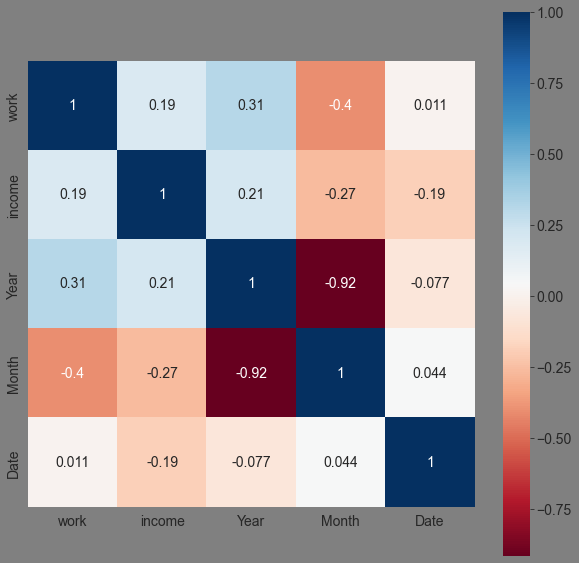

In [16]:
corrmat = series.corr()

pyplot.subplots(figsize=(10,10), facecolor='#808080')
sns.heatmap(corrmat, cmap='RdBu', annot=True, square=True)

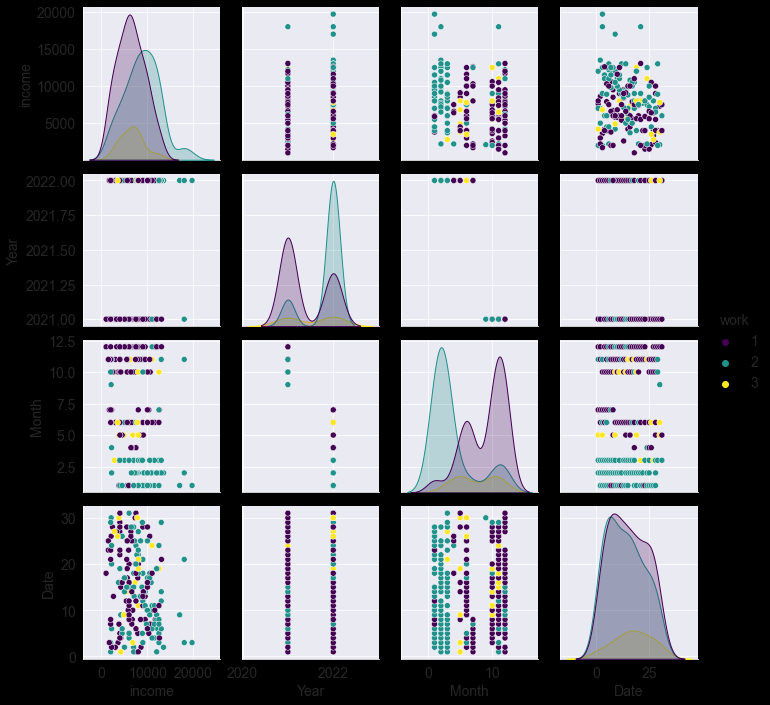

In [17]:
sns.pairplot(data=series, hue='work', palette='viridis')

#### 1 ==> transport
#### 2 ==> ploughing
#### 3 ==> ploughing & transport 

In [18]:
work_series = series_1.pivot(columns='work', index="date")

work_series.describe()

#### 1 ==> transport
#### 2 ==> ploughing
#### 3 ==> ploughing & transport 

income                            
work              1             2             3
count     91.000000     84.000000     17.000000
mean    6437.912088   8791.666667   6691.176471
std     2974.916812   3822.041602   2559.799510
min     1000.000000   2000.000000   2800.000000
25%     4000.000000   6150.000000   4900.000000
50%     6000.000000   8950.000000   6800.000000
75%     8550.000000  11500.000000   8000.000000
max    13050.000000  19700.000000  12500.000000

In [19]:
#### 1 ==> transport
#### 2 ==> ploughing
#### 3 ==> ploughing & transport 

df_1 = work_series[[('income', 1)]]
df_2 = work_series[[('income', 2)]]
df_3 = work_series[[('income', 3)]]


df_3 = df_3.dropna()

In [20]:
list_df = [df_1, df_2, df_3]

for i in list_df:
    i.columns = i.columns.droplevel(level=1)

    def sub_plots_3(df_1, df_2, df_3, title):
        fig, axes = pyplot.subplots(3, 1, figsize=(15, 8), facecolor="#808080", sharey=True)
        fig.suptitle(title)

        plot_1 = sns.lineplot(ax=axes[0], data=df_1, color='blue')
        axes[0].set(ylabel = 'Transport')

        plot_2 = sns.lineplot(ax=axes[1], data=df_2, color='red')
        axes[1].set(ylabel='Ploughing')

        plot_3 = sns.lineplot(ax=axes[2], data=df_3, color='green')
        axes[2].set(ylabel='Transport & ploughing')


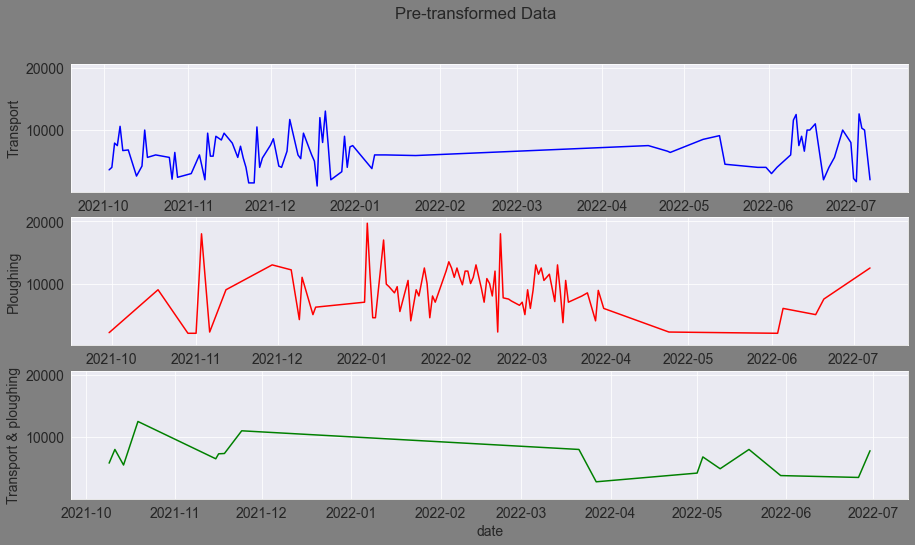

In [21]:
sub_plots_3(df_1.income, df_2.income, df_3.income, 'Pre-transformed Data')

In [22]:
#normalization
def Normalize(df,col):
    average = df[col].mean()
    stdev = df[col].std()
    
    df_normalized = (df[col] - average) / stdev
    df_normalized = df_normalized.to_frame()

    return df_normalized, average, stdev


In [23]:
# Differencing Function
def Difference(df,col, interval):
    diff = []

    for i in range(interval, len(df)):
        value = df[col][i] - df[col][i - interval]
        diff.append(value)
        
    return diff

In [24]:
df_N1, av_trans, std_trans = Normalize(df_1, "income")
Diff_1 = Difference(df_N1, col="income", interval=(24*7)) 
df_N1 = df_N1[24*7:]
df_N1.columns = ["Norm"]
df_N1["Diff"]= Diff_1

In [37]:
df_N1.head()

,Norm,Diff
date,,
2022-06-10,1.735204,NaN
2022-06-11,2.037734,2.991680
2022-06-12,0.357014,1.176503
2022-06-13,0.861230,0.369758
2022-06-14,0.054485,-0.302529


In [25]:
df_N2, av_pl, std_pl = Normalize(df_2, "income")
Diff_2 = Difference(df_N2, col="income", interval=(24)) 
df_N2 = df_N2[24:]
df_N2.columns = ["Norm"]
df_N2["Diff"]= Diff_2

In [26]:
df_N3, av_trpl, std_trpl = Normalize(df_3, "income")
Diff_3 = Difference(df_N3, col="income", interval=1) 
df_N3 = df_N3[1:]
df_N3.columns = ["Norm"]
df_N3["Diff"]= Diff_3

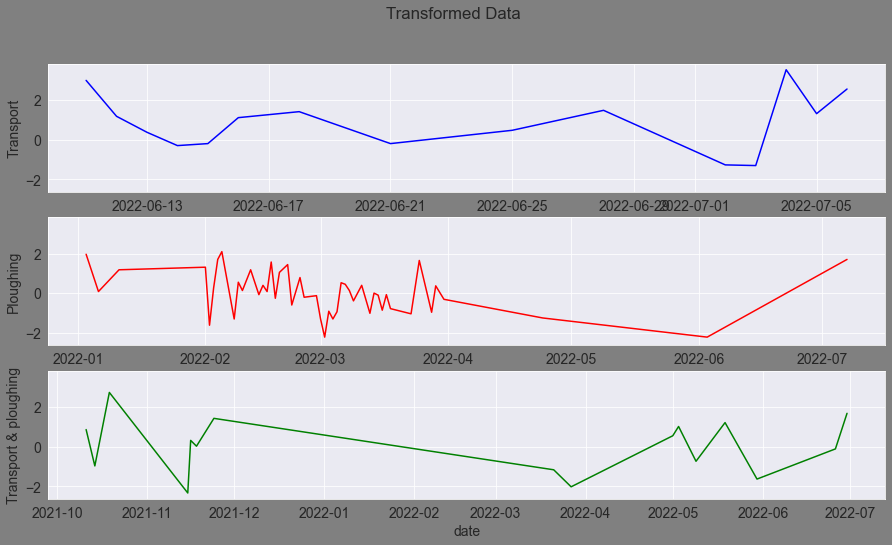

In [27]:
sub_plots_3(df_N1.Diff, df_N2.Diff,df_N3.Diff, "Transformed Data")

In [28]:
#Stationary Check for the time series - the Augmented Dickey Fuller test
def Stationary_check(df):
    check = adfuller(df.dropna())

    print(f"ADF Statistic: {check[0]}")
    print(f"p-value: {check[1]}")
    print("Critical Values:")

    for key, value in check[4].items():
        print('\t%s: %.3f' % (key, value))
    if check[0] > check[4]["1%"]:
        print("Non-Stationary")
    else:
        print("Stationary") 

#Checking if the series is stationary
List_df_ND = [ df_N1["Diff"], df_N2["Diff"], df_N3["Diff"]] 
print("stationarity check:")
for i in List_df_ND:
    print("\n")
    Stationary_check(i)

stationarity check:


ADF Statistic: -3.444508263751443
p-value: 0.009531990463786198
Critical Values:
	1%: -4.012
	5%: -3.104
	10%: -2.691
Non-Stationary


ADF Statistic: -6.348495514725851
p-value: 2.646423644385202e-08
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
Stationary


ADF Statistic: -148.25635042827003
p-value: 0.0
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772
Stationary


In [46]:

df_transport = df_N1["Diff"].dropna()
df_transport = df_transport.to_frame()

df_plough = df_N2["Diff"].dropna()
df_plough = df_plough.to_frame()

df_transplough = df_N3["Diff"].dropna()
df_transplough = df_transplough.to_frame()

In [47]:
print(df_transport.shape)
print(df_plough.shape)
print(df_transplough.shape)

(15, 1)
(47, 1)
(16, 1)


In [48]:
#Splitting the dataset
def Split_data(df):
    training_size = int(len(df)*0.80)
    data_len = len(df)
    
    train, test = df[0:training_size], df[training_size:data_len] 
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)
    
    return train, test

In [49]:
#Splitting the training and test datasets 
transport_train, transport_test = Split_data(df_transport)
plough_train, plough_test = Split_data(df_plough)
transplough_train, transplough_test = Split_data(df_transplough)

In [50]:
#Target and Feature
def TnF(df):
    end_len = len(df)
    X = []
    y = []
    steps = 20
    for i in range(steps, end_len):
        X.append(df[i - steps:i, 0])
        y.append(df[i, 0])
    X, y = np.array(X), np.array(y)
    
    return X, y

In [68]:
#fixing the shape of X_test and X_train
def FeatureFixShape(train, test):
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))
    test = np.reshape(test, (test.shape[0], test.shape[1], 1))
    return train, test

In [69]:
#Assigning features and target 
X_train_trans, y_train_trans = TnF(transport_train)
X_test_trans, y_test_trans = TnF(transport_test)
#X_train_trans, X_test_trans = FeatureFixShape(X_train_trans, X_test_trans)

X_train_pl, y_train_pl = TnF(plough_train)
X_test_pl, y_test_pl = TnF(plough_test)
#X_train_pl, X_test_pl = FeatureFixShape(X_train_pl, X_test_pl)

X_train_pltr, y_train_pltr = TnF(transplough_train)
X_test_pltr, y_test_pltr = TnF(transplough_test)
#X_train_pltr, X_test_pltr = FeatureFixShape(X_train_pltr, X_test_pltr)

In [53]:
colors_1 = ['red', 'green', 'blue', 'purple']

In [70]:
#The GRU model 
#Model for the prediction
def GRU_model(X_Train, y_Train, X_Test):
    early_stopping = callbacks.EarlyStopping(min_delta=0.001, monitor='loss', patience=10, restore_best_weights=True) 

    model = Sequential()
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    
    #model.add(GRU(units=50, return_sequences=True,  input_shape=(X_Train.shape[1],1),activation='tanh'))
    #model.add(Dropout(0.2))
    model.add(GRU(units=50, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    #Compiling the model
    model.compile(optimizer=SGD(decay=1e-7, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train,y_Train, epochs=20, batch_size=100, callbacks=[early_stopping])

    pred_GRU= model.predict(X_Test)
    
    return pred_GRU


In [71]:
#To calculate the root mean squred error in predictions
def RMSE_Value(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

In [72]:
#To plot the comparitive plot of targets and predictions
def PredictionsPlot(test,predicted,m):
    pyplot.figure(figsize=(12,5),facecolor="#627D78")
    
    pyplot.plot(test, color=colors[m],label="True Value",alpha=0.5 )
    pyplot.plot(predicted, color="#627D78",label="Predicted Values")
    
    pyplot.title("Tractor income prediction Vs True values")
    pyplot.xlabel("Date")
    pyplot.ylabel("Income")
    
    pyplot.legend()
    pyplot.show()

In [73]:
Pred_transport = GRU_model(X_train_trans,y_train_trans, X_test_trans)

ValueError: Exception encountered when calling layer "gru" (type GRU).

slice index 0 of dimension 0 out of bounds. for '{{node strided_slice_1}} = StridedSlice[Index=DT_INT32, T=DT_FLOAT, begin_mask=0, ellipsis_mask=0, end_mask=0, new_axis_mask=0, shrink_axis_mask=1](transpose, strided_slice_1/stack, strided_slice_1/stack_1, strided_slice_1/stack_2)' with input shapes: [0,?,1], [1], [1], [1] and with computed input tensors: input[1] = <0>, input[2] = <1>, input[3] = <1>.

Call arguments received:
  • inputs=tf.Tensor(shape=(None, 0, 1), dtype=float32)
  • mask=None
  • training=None
  • initial_state=None

In [ ]:
RMSE_transport = RMSE_Value(y_test_trans,Pred_transport)

PredictionsPlot(y_test_trans,Pred_transport, 0)

In [ ]:
Pred_plough = GRU_model(X_train_pl, y_train_pl, X_test_pl)

In [ ]:
RMSE_plough = RMSE_Value(y_test_pl, Pred_plough)
PredictionsPlot(y_test_pl, Pred_plough, 0)

In [ ]:
Pred_plough_transport = GRU_model(X_train_pltr, y_train_pltr, X_test_pltr)

In [ ]:
RMSE_plough_transport = RMSE_Value(y_test_pltr, Pred_plough_transport)
PredictionsPlot(y_test_pltr, Pred_plough_transport, 0)